# FigureS6:  NTRK2 and HPGD supplementals
C)	HPGD IF quantification (might leave out for initial submission) (Rachel)
D)	NTRK2/HPGD RNAscope images – if you can get these to me I can quantify.
E)	RNAscope quantification (might leave out for initial submission)

In [2]:
%%capture

# settings
wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
warnings.filterwarnings('ignore')
%matplotlib inline

# import data from s3
for file in ['raw_adata', 
             'full_adata',
             'DE_df',
            ]:
#     ! aws s3 cp s3://{s3dir}/{file}.p {wkdir}/
    var = pickle.load((open(f'{wkdir}/{file}.p', 'rb')))
    exec(f'{file} = var')
    del var
    
usable_cores = multiprocessing.cpu_count()-1

# update subtypes
full_adata.obs['subtypes'] = ['follicular' if x in ['light_foll_mel', 'dark_foll_mel', 'cyc_foll_mel'] \
                         else y \
                         for x,y in zip(full_adata.obs.class_1, full_adata.obs.subtypes)]

# label order
dev_stage_order = ['fet','neo','adt']
subtypes_order = ['cutaneous','acral','foreskin','follicular']
acral_subtype_order = ['acral','not_acral']
foreskin_subtype_order = ['foreskin','not_foreskin']
follicular_subtype_order = ['follicular','not_follicular']
dev_subtype_order = ['fet_acral','fet_cutaneous','fet_follicular','neo_foreskin','adt_acral','adt_cutaneous']

# create class_2 for site granularity
full_adata.obs['class_2'] = [x if x not in ['mel'] \
                             else f'{y}_mel'
                             for x,y in zip(full_adata.obs['class_1'], full_adata.obs['subtypes'])]

# create class_3 for site+dev_stage granularity
full_adata.obs['class_3'] = [x if not x.endswith('_mel') or x.startswith('cyc_') \
                             else f'{y}_{x}'
                             for x,y in zip(full_adata.obs['class_2'], full_adata.obs['dev_stage'])]

# update class_1 to pool by cell type
full_adata.obs['class_1'] = [x if not x.endswith('_mel') \
                             else 'mel' if not x.startswith('cyc_') \
                             else 'cyc_mel' \
                             for x in full_adata.obs['class_1']]
type_order_1 = ['mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]
    
DE_df['class_1'] = (DE_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order_1, ordered=True))
                     )
DE_df = DE_df.dropna()

type_order_2 = ['light_foll_mel',
                'dark_foll_mel',
                'foreskin_mel',
                'acral_mel',
                'cutaneous_mel',
                'cyc_foll_mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

type_order_3 = ['adt_cutaneous_mel',
                'adt_acral_mel',
                'neo_foreskin_mel',
                'fet_cutaneous_mel',
                'fet_acral_mel',
                'fet_dark_foll_mel',
                'fet_light_foll_mel',][::-1] + \
                ['cyc_mel',
                'cyc_foll_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

color_code_dict = {'dendritic':'#b99abf',
                   'cyc_dendritic':'#9abfb9',
                   'eccrine':'#CBB7E3',
                   'cyc_eccrine':'#b7e3cb',
                   'krt':'#E9E1F2',
                   'cyc_krt':'#e1f2e9',
                   'mast':'#AE90C2',
                   'T_cell':'#5F3D68',
                   'mel':'#000000',
                   'cyc_mel':'#999999',
                   'cutaneous_mel':'#FF0000',
                   'cutaneous':'#FF0000',
                   'leg':'#FF0000',
                   'arm':'#FF0000',
                   'acral_mel':'#0000FF',
                   'acral':'#0000FF',
                   'palm':'#0000FF',
                   'sole':'#0000FF',
                   'foreskin_mel':'#FFA500',
                   'foreskin':'#FFA500',
                   'dark_foll_mel':'#003300',
                   'light_foll_mel':'#99cc99',
                   'follicular':'#008000',
                   'hair_follicle':'#008000',
                   'fet_cutaneous_mel':'#ff4c4c',
                   'adt_cutaneous_mel':'#b20000',
                   'shallow_regime':'#b20000',
                   'steep_regime':'#00b2b2',
                   'fet_acral_mel':'#4c4cff',
                   'adt_acral_mel':'#0000b2',
                   'neo_foreskin_mel':'#FFA500',
                   'fet_dark_foll_mel':'#003300',
                   'fet_light_foll_mel':'#99cc99',
                   'fet':'#dbc2a9',
                   'neo':'#c09569',
                   'adt':'#a5682a',
                   'NTRK2+/HPGD+':'#474747',
                   'NTRK2-/HPGD-':'#DDDDDD',
                   'NTRK2+/HPGD-':'#0000FF',
                   'NTRK2-/HPGD+':'#FF0000',
                   'black':'#000000',
                   'grey':'#D3D3D3',
                   'melanoma':'#935aff',
                   'mel':'#935aff',
                   'follicular_like':'#6514ff',
                   'adult_interfollicular':'#ff1439',
                   'follicular_low':'#ff1439',
                   'interfoll_mel':'#ff1439',
                   'neonatal_interfollicular':'#ffda14',
                   'fetal_interfollicular':'#1439ff',
                   'fetal_follicular':'#39ff14',
                   'follicular_high':'#39ff14',
                   'light_foll_mel':'#39ff14',
                   'dark_foll_mel':'#93ba8b',
                   'norm':'#000000',
                   'cluster_1':'#ff1439',
                   'cluster_0':'#ffda14',
                   'cluster_2':'#39ff14',
                  }
heatmap_cmap = 'jet'


## recluster on mels only

In [17]:
# enforce patient-level class balance
full_slice = (pd.DataFrame(full_adata[[x in ['cutaneous_mel','acral_mel',] for x in full_adata.obs.class_2]]
             .obs
             .loc[:, ['class_2','patient']]
             .groupby('patient')['class_2']
             .value_counts()
            )
              .rename(columns={'class_2':'count'})
              .reset_index()
             )
patient_list = []
count_list = []
for patient in set(full_slice.patient):
    patient_slice = full_slice.query(f'patient == "{patient}"')
    if len(patient_slice) == 2:
        patient_list.append(patient)
        count_list.append(min(patient_slice['count']))
        
min_matched_df = pd.DataFrame({'patient':patient_list, 'count':count_list})

coi_list = []
for row in range(len(min_matched_df)):
    row_slice = min_matched_df.iloc[row,:]
    patient_name = row_slice['patient']
    count_val = row_slice['count']
    for subtype in ['cutaneous_mel','acral_mel',]:
        sub_coi = (full_adata[[x in ['cutaneous_mel','acral_mel',] for x in full_adata.obs.class_2]]
                     .obs
                     .loc[:, ['class_2','patient']]
                     .query(f'class_2 == "{subtype}"')
                     .sample(count_val)
                     .index
                     .tolist()
                    )
        coi_list = coi_list + sub_coi

1289

In [18]:
n_pcs = 75
raw_adata.obs['recluster'] = [x in coi_list for x in raw_adata.obs.index]
adata_subset2 = raw_adata[raw_adata.obs['recluster'] == True]
adata_subset2 = sc.pp.log1p(adata_subset2, copy=True) # new
sc.pp.highly_variable_genes(adata_subset2,min_mean=0.1,max_mean=10,min_disp=0.5) # new
sc.pp.scale(adata_subset2) # new
sc.tl.pca(adata_subset2,svd_solver='arpack', use_highly_variable = True, n_comps=n_pcs, random_state=1) # new
sc.pp.neighbors(adata_subset2, n_pcs=n_pcs, n_neighbors=100, random_state=1) # new
sc.tl.umap(adata_subset2, min_dist = 0.5, random_state=1, init_pos='random')
sc.tl.louvain(adata_subset2, resolution = 0.25, random_state=1)

# add feature labels
for input_adata in [adata_subset2]:
    input_adata.obs['true_year'] = [float(x.split('WK')[0])/52 if len(x.split('WK')[0]) <= 3 else np.nan for x in input_adata.obs.patient]
    input_adata.obs['true_year'] = [y+(9/12) if np.isnan(x) else x for x,y in zip(input_adata.obs['true_year'], input_adata.obs['age']) ]

    input_adata.obs['dev_stage'] = ['adt' if x > 0 else 'neo' if x == 0 else 'fet' for x in input_adata.obs.age]
    input_adata.obs['subtypes'] = [x if x in ['acral','foreskin'] else 'cutaneous' for x in input_adata.obs.general_location]
    foll_idx = full_adata[[x in ['light_foll_mel','dark_foll_mel'] for x in full_adata.obs.class_2]].obs.index.tolist()
    input_adata.obs['subtypes'] = ['follicular' if x in foll_idx \
                                   else y for x,y in zip(input_adata.obs.index, input_adata.obs['subtypes'])]
    input_adata.obs['acral_subtype'] = [x if x == 'acral' else 'not_acral' for x in input_adata.obs['subtypes']]
    input_adata.obs['foreskin_subtype'] = [x if x == 'foreskin' else 'not_foreskin' for x in input_adata.obs['subtypes']]
    input_adata.obs['follicular_subtype'] = [x if x == 'follicular' else 'not_follicular' for x in input_adata.obs['subtypes']]

    input_adata.obs['dev_subtype'] = [f'{x}_{y}' for x,y in zip(input_adata.obs.dev_stage, input_adata.obs.subtypes)]


    for i in ['dev_stage', 'subtypes', 'acral_subtype' ,'foreskin_subtype','follicular_subtype','dev_subtype']:
        input_adata.obs[i] =  (input_adata
                                 .obs[i]
                                 .astype(str)
                               .astype(CategoricalDtype(eval(f'{i}_order'), ordered = True))
                              )
            

## Melanocyte only PCs showing volar vs not volar

In [28]:
pca_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_68,pc_69,pc_70,pc_71,pc_72,pc_73,pc_74,pc_75,acral_subtype,coi_id
0,-23.318108,5.031646,-4.773181,-0.453384,-0.092914,-0.152213,-0.360585,-0.784606,0.724297,-0.853971,...,-0.289316,-0.054864,-0.921707,-0.022238,-1.131686,0.251820,0.590840,-0.186187,not_acral,H16_B003063
1,-17.269053,1.048702,-1.699694,0.172990,-0.062387,0.421529,0.292494,-0.539457,1.079538,-0.394931,...,-0.026655,0.166499,-0.834190,1.114381,-1.124654,0.167112,0.877671,-0.315085,not_acral,H9_B003063
2,-7.676926,-7.028654,5.555649,4.283096,7.268432,-2.399201,-1.149157,-7.597057,6.077465,3.222036,...,9.714621,1.939770,-5.054449,1.781537,-10.548313,-0.268734,17.945145,-2.441986,not_acral,H12_B003063
3,-17.686666,1.754054,-0.487879,1.567123,1.122957,-0.573685,-1.387168,0.494814,1.684171,-1.483668,...,0.426119,-0.092915,-0.717267,0.453343,-1.622983,-0.079612,0.236590,0.101689,not_acral,H6_B003063
4,-22.603794,4.123208,-4.106574,1.177761,-0.695169,0.516640,0.480763,-0.718692,0.647075,-0.913030,...,0.390886,-0.079599,-0.483311,0.778769,-0.740604,0.066956,0.010677,0.685715,not_acral,O4_B003063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,-15.279861,-1.776470,0.676168,-2.672133,1.081607,-0.615290,0.233539,2.611135,-2.413072,1.282267,...,-1.437586,-1.216237,0.538358,-0.951235,1.159113,0.403774,-1.098608,0.986089,acral,P6_B002549
2082,12.167459,-18.197271,13.879755,-2.108112,0.533771,-1.802159,0.914495,3.215559,-3.533485,0.403974,...,-5.756643,-1.989496,27.153198,20.473949,-10.160975,1.046879,12.749610,20.924492,not_acral,P6_B002550
2083,-4.493227,-7.765281,5.091553,-2.621674,2.244000,-0.330153,0.920850,2.897405,-2.600272,3.073586,...,1.462436,-0.104414,0.031934,-2.146151,-1.010497,0.761436,-0.044643,1.804526,not_acral,P8_B002522
2084,11.708081,-11.667593,9.635444,-2.681842,-0.954318,-1.126096,0.381697,-0.961919,-1.905851,0.102489,...,-0.901996,3.053905,-0.433765,-0.851154,1.954950,0.496721,1.673707,0.427920,acral,P8_B002549


In [40]:
pca_df_slice.query(f'pc_{pc_val} > {q95}')

,pc_10,coi_id
2,3.222036,H12_B003063
100,3.047338,K19_B003520
134,2.448331,C21_B003096
170,4.724309,L10_B003580
175,2.776014,F14_B003580
...,...,...
2052,40.522579,O16_B002550
2053,3.657687,O17_B002522
2055,11.912346,O18_B002550
2067,2.512802,O9_B002550


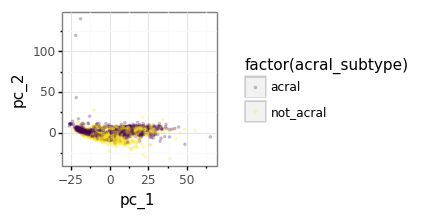

<ggplot: (-9223363247439800397)>


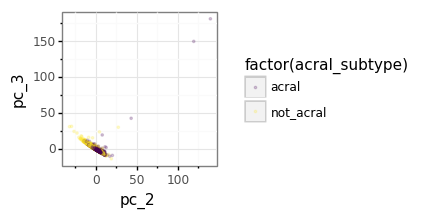

<ggplot: (-9223363247440150107)>


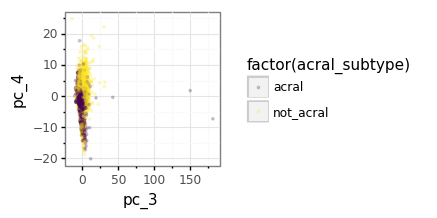

<ggplot: (-9223363247440350229)>


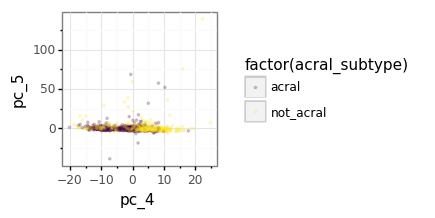

<ggplot: (-9223363247478177981)>


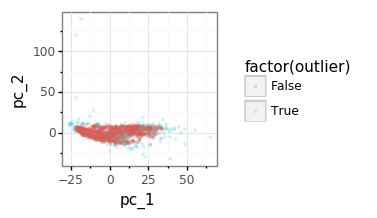

<ggplot: (-9223363247440387482)>


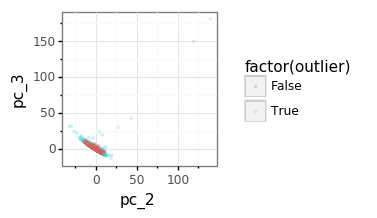

<ggplot: (8789417390845)>


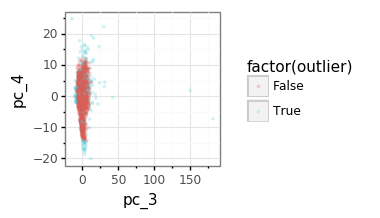

<ggplot: (8789414722487)>


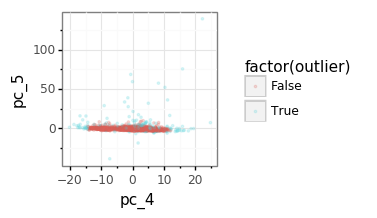

<ggplot: (-9223363247478340250)>


In [42]:
pca_df = pd.DataFrame(adata_subset2.obsm['X_pca'])
pca_df.columns = [f'pc_{int(x)+1}' for x in pca_df.columns]
pca_df['acral_subtype'] = adata_subset2.obs['acral_subtype'].values
pca_df['coi_id'] = adata_subset2.obs.index.values

omit_list = []
for pc_val in range(1,11,1):
    pca_df_slice = pca_df.loc[:,[f'pc_{pc_val}','coi_id']]
    qupper = pca_df_slice.quantile(0.99).values[0]
    qlower = pca_df_slice.quantile(0.01).values[0]
    omit_list = omit_list + pca_df_slice.query(f'pc_{pc_val} > {qupper}').coi_id.tolist()
    omit_list = omit_list + pca_df_slice.query(f'pc_{pc_val} < {qlower}').coi_id.tolist()
pca_df['outlier'] = [x in omit_list for x in pca_df['coi_id']]

plotnine.options.figure_size=(2,2)
for x in range(1,5,1):
    plot = (ggplot(pca_df)
            + theme_bw()
            + geom_point(aes(f'pc_{x}',f'pc_{x+1}',color='factor(acral_subtype)'),
                         size=0.5, alpha = 0.2
                        )
           )
    print(plot)
    
for x in range(1,5,1):
    plot = (ggplot(pca_df)
            + theme_bw()
            + geom_point(aes(f'pc_{x}',f'pc_{x+1}',color='factor(outlier)'),
                         size=0.5, alpha = 0.2
                        )
           )
    print(plot)

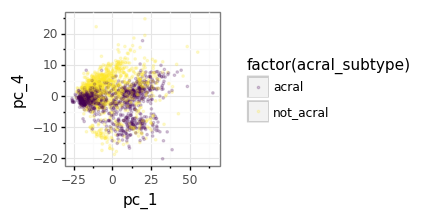

<ggplot: (8789376803080)>


In [23]:
plot = (ggplot(pca_df)
            + theme_bw()
            + geom_point(aes('pc_1',f'pc_4',color='factor(acral_subtype)'),
                         size=0.5, alpha = 0.2
                        )
           )
print(plot)

## Melanocyte only PC space with HPGD  and NTRK expression overlay

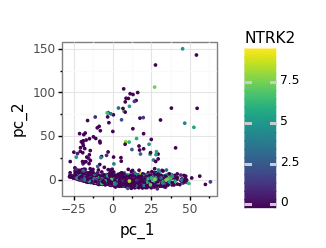

<ggplot: (-9223363242758714529)>


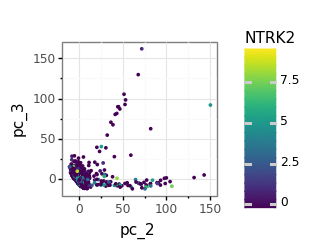

<ggplot: (8794095771954)>


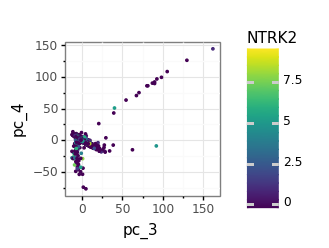

<ggplot: (8794095615713)>


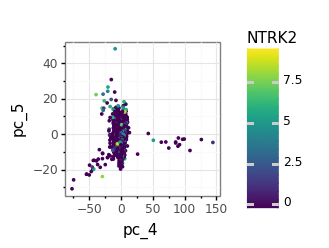

<ggplot: (8794134923689)>


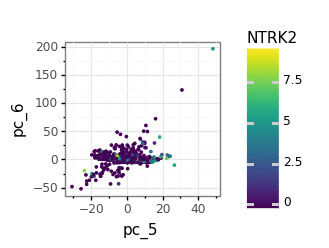

<ggplot: (8794140617469)>


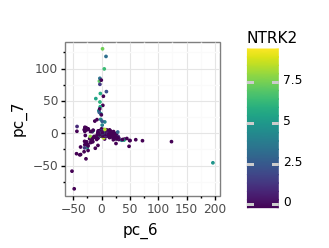

<ggplot: (8794141888376)>


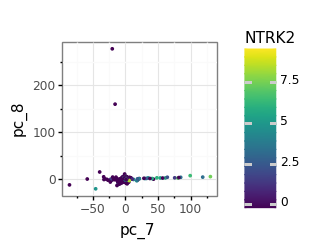

<ggplot: (-9223363242714079011)>


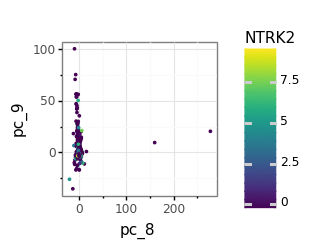

<ggplot: (-9223363242713736967)>


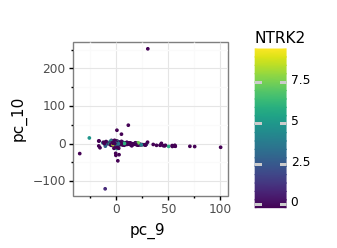

<ggplot: (-9223363242713969492)>


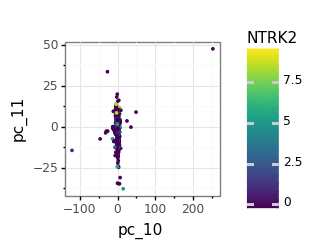

<ggplot: (-9223363242713790141)>


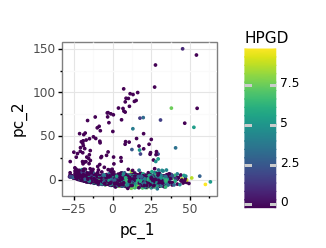

<ggplot: (-9223363242759155740)>


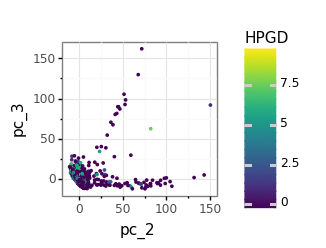

<ggplot: (8794095708406)>


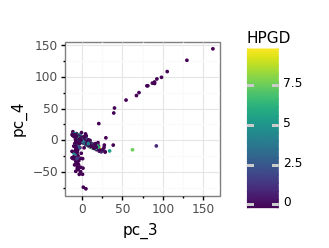

<ggplot: (8794095821155)>


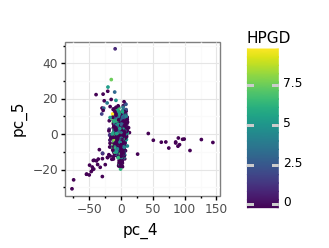

<ggplot: (-9223363242719589446)>


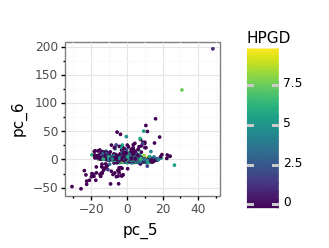

<ggplot: (-9223363242758233761)>


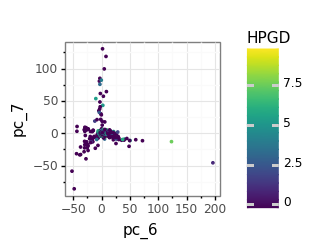

<ggplot: (8794141182223)>


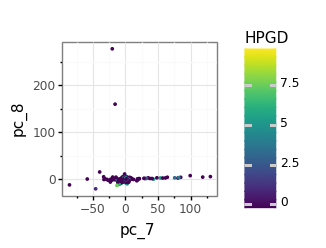

<ggplot: (-9223363242758704226)>


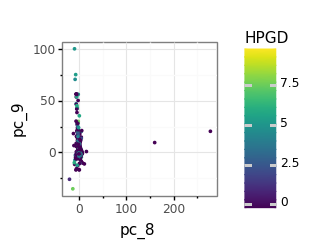

<ggplot: (-9223363242719869987)>


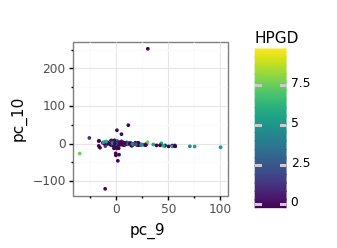

<ggplot: (-9223363242758074799)>


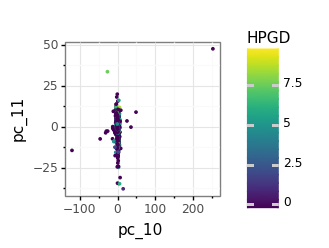

<ggplot: (8794141786488)>


In [37]:
pca_df = pd.DataFrame(adata_subset2.obsm['X_pca'])
pca_df.columns = [f'pc_{int(x)+1}' for x in pca_df.columns]
pca_df['HPGD'] = df['HPGD'].values
pca_df['NTRK2'] = df['NTRK2'].values

plotnine.options.figure_size=(2,2)
for genoi in ['NTRK2','HPGD']:
    for x in range(1,11,1):
        plot = (ggplot(pca_df)
                + theme_bw()
                + geom_point(aes(f'pc_{x}',f'pc_{x+1}',color=genoi),
                             size=0.5
                            )
               )
        print(plot)